<a href="https://colab.research.google.com/github/macrodatascience/python/blob/main/Python_Map_Filter_Reduce_Prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Map Function takes 2 inputs - first the function to apply, and the second the iterable (list, tuple)**

## **Output of Map is a Map Object which is an iterator over the results**

## **Pass the Map object to the list constructor**

In [5]:
import math

def area(r):
  """ Area of a circle with radius r """
  return math.pi * (r**2)

radii = [1,2,3,4,5,6]

print(list(map(area, radii)))
print(tuple(map(area, radii)))

[3.141592653589793, 12.566370614359172, 28.274333882308138, 50.26548245743669, 78.53981633974483, 113.09733552923255]
(3.141592653589793, 12.566370614359172, 28.274333882308138, 50.26548245743669, 78.53981633974483, 113.09733552923255)


In [11]:
# Lambda expression to convert celsius to fahrenheit

c_to_f = lambda x: (x[0], x[1]*(9/5)+32)

temps_in_cels = [('New York', 25), ('DC', 30), ('Dallas', 35), ('London', 20), ('Hong Kong', 25), ('Singapore', 36), ('Mumbai', 40), ('Hyderabad', 45)]

print(list(map(c_to_f, temps_in_cels)))

[('New York', 77.0), ('DC', 86.0), ('Dallas', 95.0), ('London', 68.0), ('Hong Kong', 77.0), ('Singapore', 96.8), ('Mumbai', 104.0), ('Hyderabad', 113.0)]


In [12]:
import statistics

data = [1.3, 2.5, 5.6, 6.4, 6.7, 8.9]
avg = statistics.mean(data)

list(filter(lambda x: x>avg, data))

[5.6, 6.4, 6.7, 8.9]

In [15]:
list(filter(lambda x: (x[1]*(9/5)+32) > 90, temps_in_cels))

[('Dallas', 35), ('Singapore', 36), ('Mumbai', 40), ('Hyderabad', 45)]

In [19]:
# Remove missing data

countries = ["", "India", "Japan", "Singapore", "", "", "Korea", "China", "", "Taiwan", "Malaysia"]
list(filter(None, countries))

['India', 'Japan', 'Singapore', 'Korea', 'China', 'Taiwan', 'Malaysia']

In [83]:
list(filter(lambda x:x!='', countries))

['India', 'Japan', 'Singapore', 'Korea', 'China', 'Taiwan', 'Malaysia']

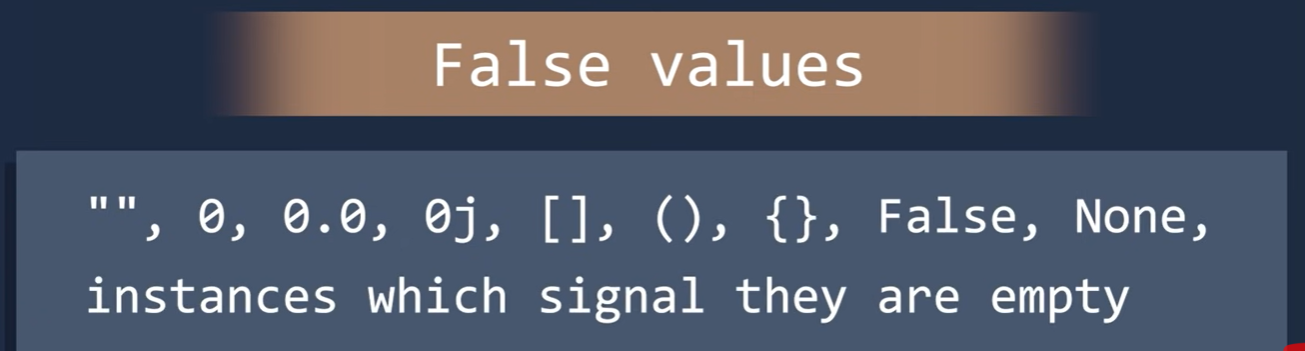

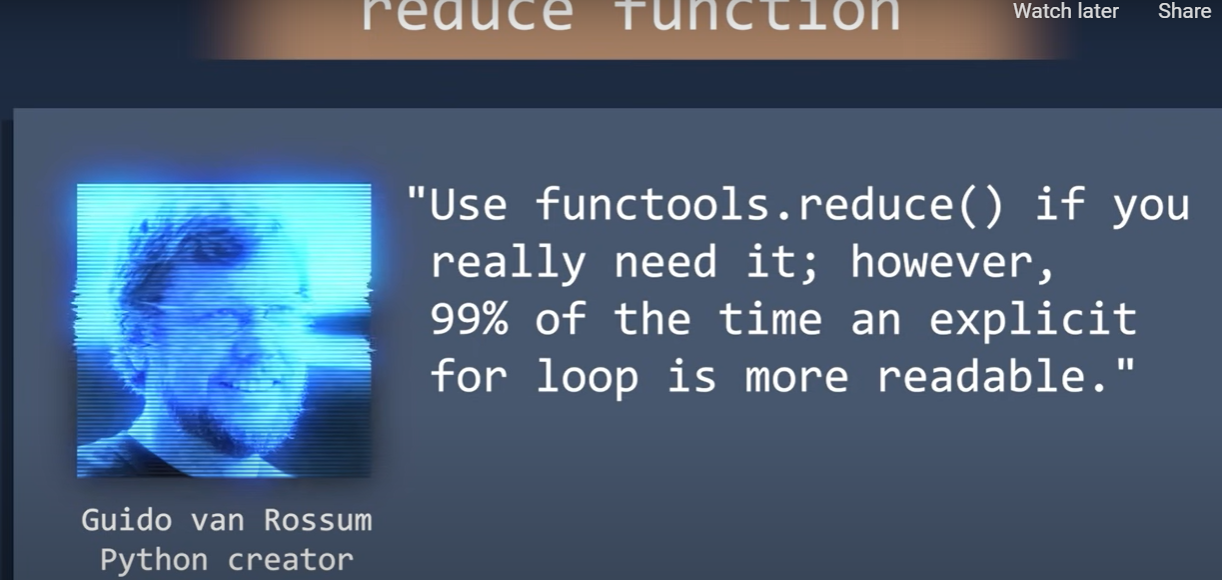

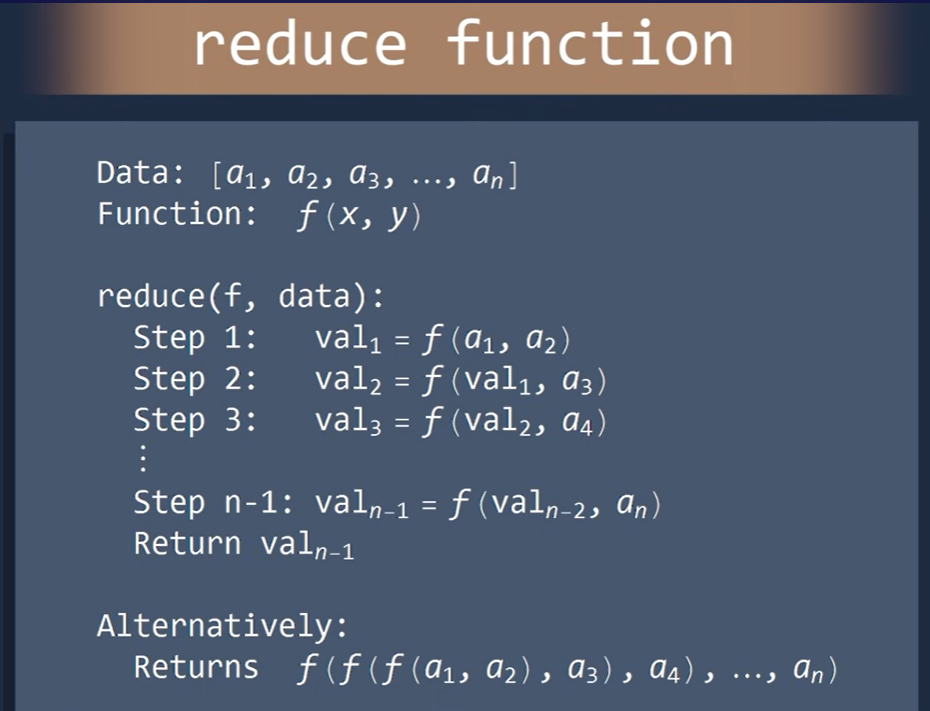

In [33]:
## Multiply all numbers in a list

data = [2,3,5,7,11,13,17,23,29,31,37,41,43,47]

from functools import reduce

reduce(lambda x, y: x*y, data)

32362620136236390

In [30]:
prod = 1
for x in data:
  prod *= x
prod

32362620136236390

In [34]:
# Prime
# Composite
# Unit (Neither prime nor composite)

In [78]:
def is_prime_v1(n):
  """ Return True if n is prime and False otherwise """

  if n==1:
    return False
  for d in range(2, n): 
    if n%d == 0:
      return False
  return True

for i in range(30):
  print(f"{i} is prime? ", is_prime_v1(i))

0 is prime?  True
1 is prime?  False
2 is prime?  True
3 is prime?  True
4 is prime?  False
5 is prime?  True
6 is prime?  False
7 is prime?  True
8 is prime?  False
9 is prime?  False
10 is prime?  False
11 is prime?  True
12 is prime?  False
13 is prime?  True
14 is prime?  False
15 is prime?  False
16 is prime?  False
17 is prime?  True
18 is prime?  False
19 is prime?  True
20 is prime?  False
21 is prime?  False
22 is prime?  False
23 is prime?  True
24 is prime?  False
25 is prime?  False
26 is prime?  False
27 is prime?  False
28 is prime?  False
29 is prime?  True


In [53]:
import time  
import timeit

print(time.time())
for i in range(1,50000):
  if is_prime_v1(i):
    pass
    #print(f"{i} is prime")

print(time.time())
%timeit is_prime_v1(10000000)

1654589489.3541808
1654589489.4501827
The slowest run took 4.54 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 693 ns per loop


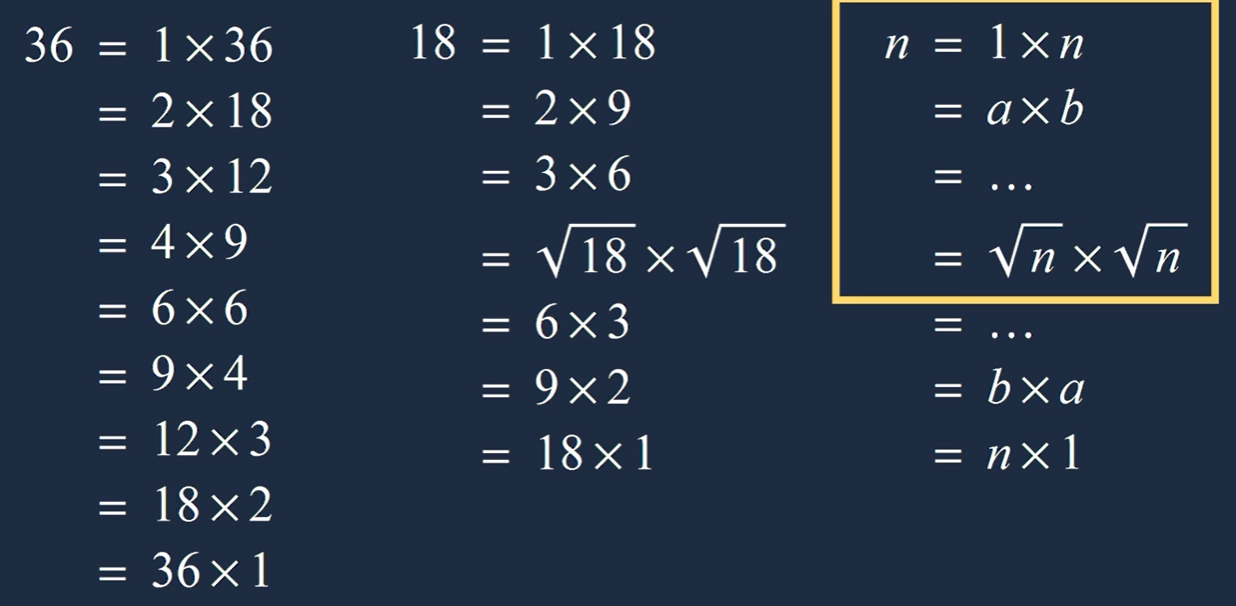

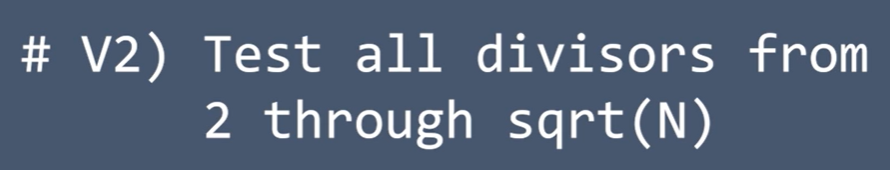

In [72]:
import math

def is_prime_v2(n):
  """ Return True if n is prime and False otherwise """
  if n == 1:
    return True
  
  max_divisor = math.floor(math.sqrt(n))

  for d in range(2, 1+max_divisor):
    if n%d==0:
      return False
  return True

In [79]:
import time 
import timeit
print(time.time())
for i in range(50000):
  if is_prime_v2(i):
    pass
print(time.time())

1654590571.3639867
1654590571.4609725


In [80]:
import time 
import timeit
print(time.time())
for i in range(50000):
  if is_prime_v1(i):
    pass
print(time.time())

1654590579.7402918
1654590589.7790408


## **Version3- If the number is even and >2, then not a prime. And while we are checking the divisor, we can exclude all the even divisors, as it will be a waste to check**

In [84]:
def is_prime_v3(n):
  """ Return True if n is a prime, and False otherwise """ 
  
  if n==1 or n==2:
    return True
  if n> 2 and n%2==0:
    return False
  max_divisor = math.floor(math.sqrt(n))
  for d in range(3, 1+max_divisor, 2):    # adding a step size of 2 to eliminate all even divisors
    if n%d == 0:
      return False
  return True

In [90]:
import time
print(time.time())
for i in range(500000):
  if is_prime_v3(i):
    pass
print(time.time())

1654592035.449838
1654592036.602744


In [91]:
import time
print(time.time())
for i in range(5000000):
  if is_prime_v2(i):
    pass
print(time.time())

1654592049.5370996
1654592102.0566454
